In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

In [56]:
types= {
    "event": "category", 
    "model": "category", 
    "condition": "category", 
    "color": "category", 
    "storage": "category"
}

df_events = pd.read_csv("events.csv", low_memory=False)

In [57]:
users = df_events[["person","new_vs_returning","city","region","country","event","timestamp"]]
users = users.loc[users["new_vs_returning"].isnull() == False]
users["new_vs_returning"].value_counts()

Returning    60480
New          26898
Name: new_vs_returning, dtype: int64

In [43]:
user = users["new_vs_returning"].value_counts()
user

Returning    60480
New          26898
Name: new_vs_returning, dtype: int64

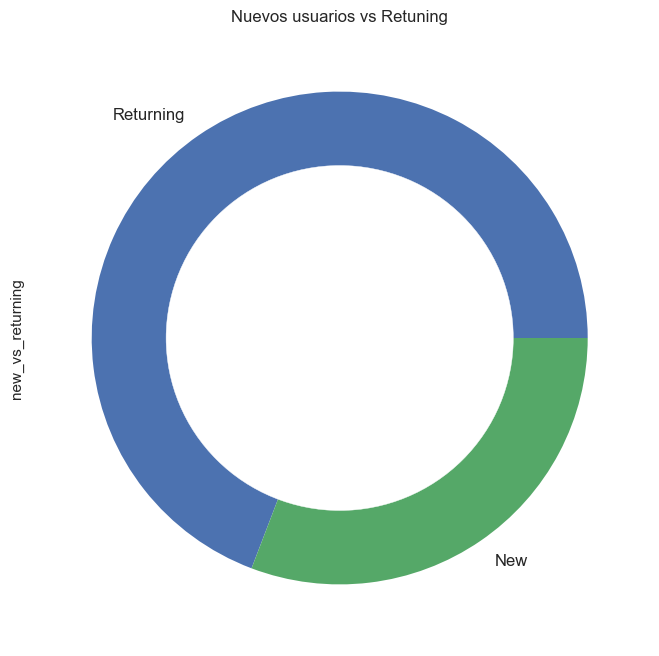

In [44]:
ax = user.plot(kind = 'pie', title = "Nuevos usuarios vs Retuning",figsize =(8,8),legend = False, fontsize = 12 )
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [45]:
users = users.loc[users["country"] != "Unknown"]
usersN = users.loc[users["new_vs_returning"] == "New"]
usersN = usersN["country"].value_counts().head(4)
usersR = users.loc[users["new_vs_returning"] == "Returning"]
usersR = usersR["country"].value_counts().head(4)
usersR

Brazil           58541
United States      168
Argentina           70
Canada              25
Name: country, dtype: int64

<function matplotlib.pyplot.show>

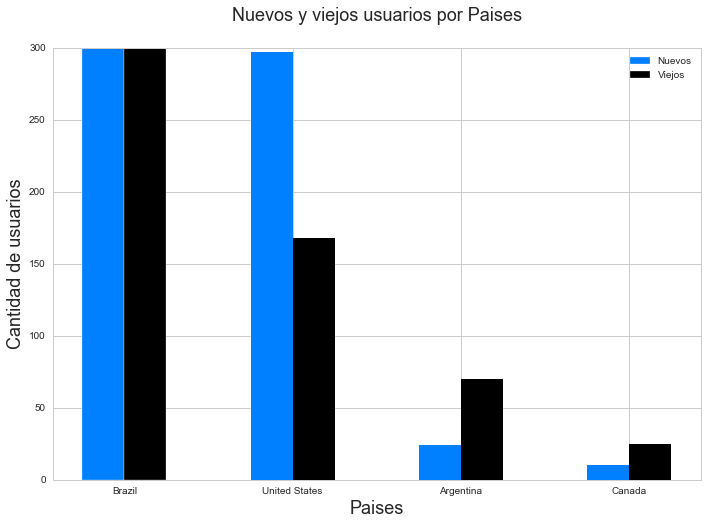

In [46]:
%matplotlib inline

#X = [1,2,3,4]
X = np.arange (len(usersN.index))
Y1 = usersN.values
Y2 = usersR.values


plt.axes([0.025,0.025,1.5,1.5])
plt.bar(X-0.125 ,Y1,facecolor = "#0080FF",label = "Nuevos", width = 0.25, align = "center",edgecolor = "white")
plt.bar(X+0.125,Y2,facecolor = "#000000",label = "Viejos", width = 0.25, align = "center",edgecolor = "white")

plt.ylim(0,300)
plt.xticks(X,usersN.index,fontsize = 10)
plt.xlabel("Paises",fontsize = 18)
plt.ylabel('Cantidad de usuarios', fontsize = 18)

plt.title('Nuevos y viejos usuarios por Paises\n', fontsize = 18)

plt.legend(loc="upper right")
plt.show

In [47]:
usersN = np.log(usersN)
usersR = np.log(usersR)

<function matplotlib.pyplot.show>

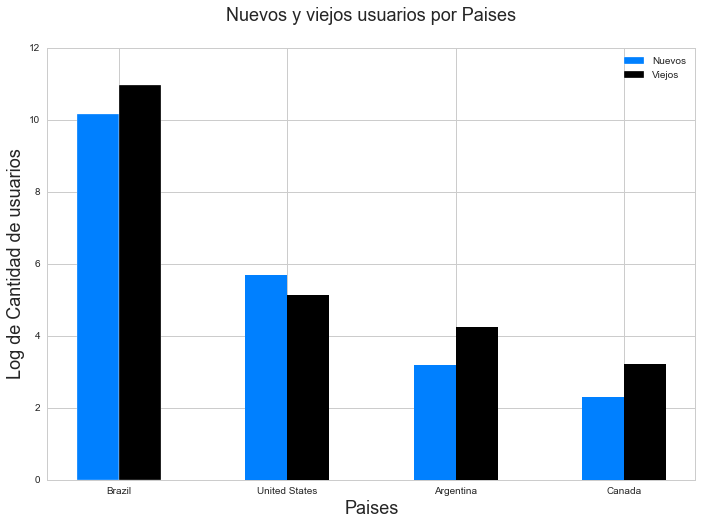

In [48]:

%matplotlib inline

#X = [1,2,3,4]
X = np.arange (len(usersN.index))
Y1 = usersN.values
Y2 = usersR.values


plt.axes([0.025,0.025,1.5,1.5])
plt.bar(X-0.125 ,Y1,facecolor = "#0080FF",label = "Nuevos", width = 0.25, align = "center",edgecolor = "white")
plt.bar(X+0.125,Y2,facecolor = "#000000",label = "Viejos", width = 0.25, align = "center",edgecolor = "white")

plt.ylim(0,12)
plt.xticks(X,usersN.index,fontsize = 10)
plt.xlabel("Paises",fontsize = 18)
plt.ylabel('Log de Cantidad de usuarios', fontsize = 18)

plt.title('Nuevos y viejos usuarios por Paises\n', fontsize = 18)

plt.legend(loc="upper right")
plt.show


        

    
#g = sns.barplot(x = usersR.index, y = usersR.values, orient='v', palette=['red'], alpha=1)
#g = sns.barplot(x = usersN.index, y = usersN.values, orient='v', palette=['green'], alpha=0.5)
#g.legend(['Returning','New'],ncol=2, loc='upper right');
#g.set_title("Nuevos usuarios vs viejos usuarios", fontsize=18)
#g.set_xlabel("Paises",fontsize=18)
#g.set_ylabel("Log de Cantidad", fontsize=18)

#usersN



#plt.show()

#sns.countplot(x = usersN.index, y = usersN.values)
#sns.countplot(usersR)

#ax = userN.plot(kind = 'barh', title = "Nuevos usuarios por Paises",figsize =(15,10),legend = False, fontsize = 12 )
#ax.subplt(userR ,color ="r")
#ax.set_xlabel("Paises", fontsize = 18)
#ax.set_ylabel("Cantidad nuevos de usuarios",fontsize = 18)

In [49]:
#users = np.log(user)
#ax = user.plot(kind = 'barh', title = "Nuevos usuarios por Paises",figsize =(15,10),legend = False, fontsize = 12 )
#ax.set_xlabel("Paises", fontsize = 18)
#ax.set_ylabel("Log cantidad nuevos de usuarios",fontsize = 18)

In [50]:
usersB = users.loc[users["country"] == "Brazil"]
usersB = usersB.loc[users["region"] != "Unknown"]
userB = usersB["region"].value_counts().head(10)
userB

Sao Paulo            24996
Minas Gerais          7755
Rio de Janeiro        6913
Bahia                 5737
Pernambuco            2962
Ceara                 2829
Parana                2602
Rio Grande do Sul     2576
Federal District      1739
Goias                 1564
Name: region, dtype: int64

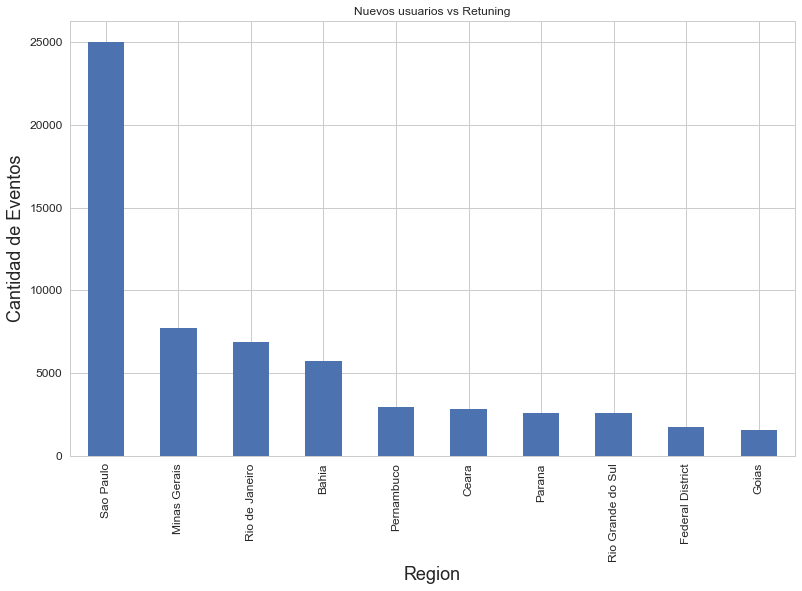

In [51]:
ax = userB.plot(kind = 'bar', title = "Nuevos usuarios vs Retuning",figsize =(13,8),legend = False, fontsize = 12 )
ax.set_xlabel("Region", fontsize = 18)
ax.set_ylabel("Cantidad de Eventos",fontsize = 18)
plt.show()

In [52]:
users = users.loc[users["country"] == "Argentina"]
users = users.loc[users["region"] != "Unknown"]
usersA = users["region"].value_counts().head(10)
usersA

Buenos Aires F.D.    76
Buenos Aires          5
Cordoba               2
Santa Fe              1
Neuquen               1
Mendoza               1
Name: region, dtype: int64

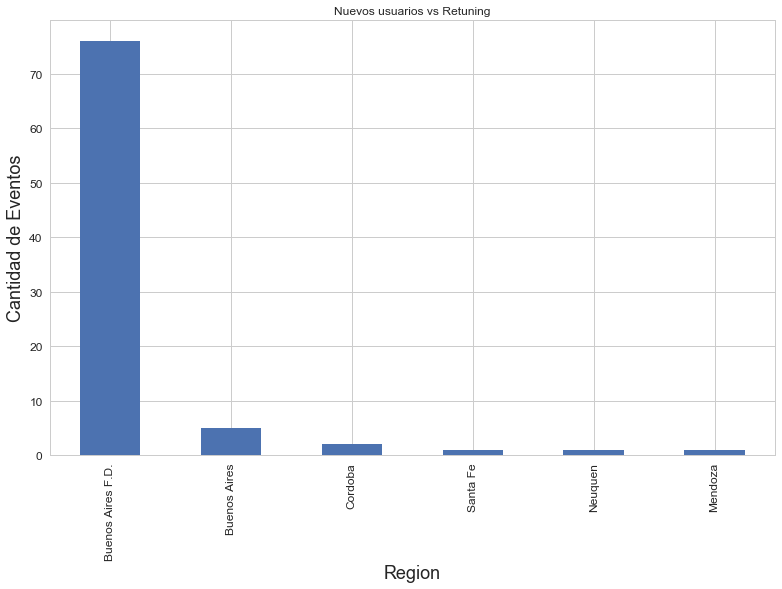

In [53]:
ax = usersA.plot(kind = 'bar', title = "Nuevos usuarios vs Retuning",figsize =(13,8),legend = False, fontsize = 12 )
ax.set_xlabel("Region", fontsize = 18)
ax.set_ylabel("Cantidad de Eventos",fontsize = 18)
plt.show()

In [58]:
usersN = users.loc[users["new_vs_returning"] == "New"]
#usersN = usersN["person"]
usersN["event"].value_counts()
usuarios_nuevos = usersN.drop_duplicates(subset='person')['person'].tolist()

_users = df_events.loc[(df_events['event'] == 'conversion') & (df_events['person'].isin(usuarios_nuevos))]
_users = _users[["person","model","condition"]]
_users
_users_condition = _users["condition"].value_counts()
_users_model = _users["model"].value_counts().head(10)
_users_model

Samsung Galaxy J5         79
iPhone 5s                 75
iPhone 6                  69
Samsung Galaxy S6 Flat    36
iPhone 6S                 34
iPhone 5c                 31
Motorola Moto G3 4G       30
Motorola Moto G4 Plus     29
Samsung Galaxy J7         27
Samsung Galaxy A5         26
Name: model, dtype: int64

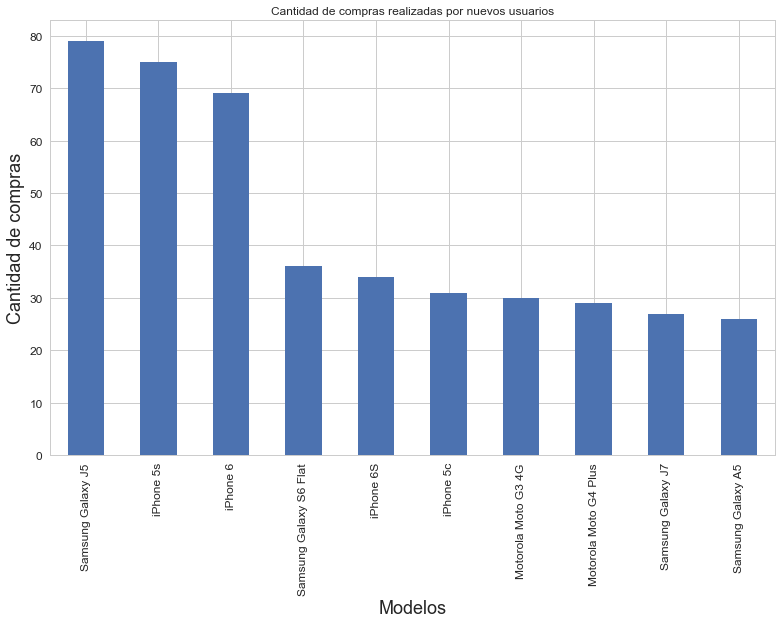

In [59]:
ax = _users_model.plot(kind = 'bar', title = "Cantidad de compras realizadas por nuevos usuarios",figsize =(13,8),legend = False, fontsize = 12 )
ax.set_xlabel("Modelos", fontsize = 18)
ax.set_ylabel("Cantidad de compras",fontsize = 18)
plt.show()

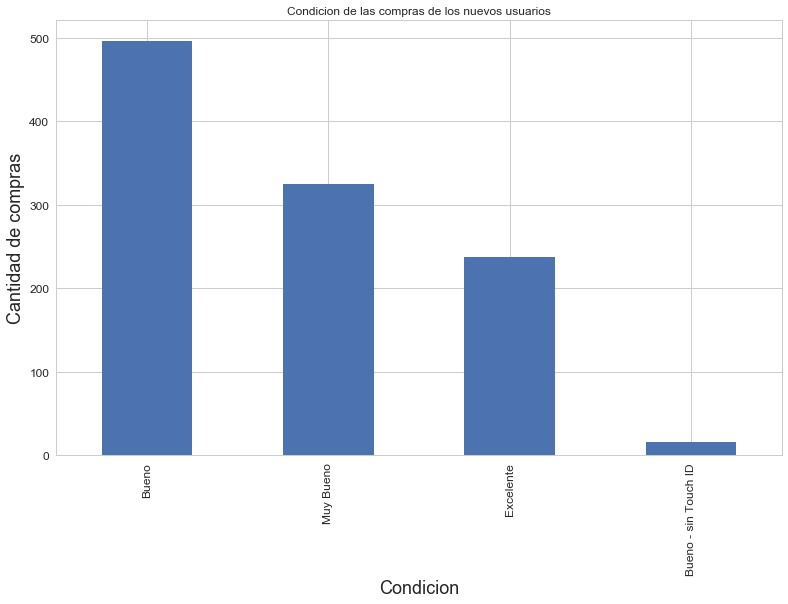

In [60]:
ax = _users_condition.plot(kind = 'bar', title = "Condicion de las compras de los nuevos usuarios",figsize =(13,8),legend = False, fontsize = 12 )
ax.set_xlabel("Condicion", fontsize = 18)
ax.set_ylabel("Cantidad de compras",fontsize = 18)
ax.set_xticklabels(["Bueno","Muy Bueno","Excelente","Bueno - sin Touch ID"])
plt.show()

usersR = users.loc[users["new_vs_returning"] == "Returning"]
#usersN = usersN["person"]
usersR["event"].value_counts()
usuarios_viejos = usersR.drop_duplicates(subset='person')['person'].tolist()

_users = df_events.loc[(df_events['event'] == 'conversion') & (df_events['person'].isin(usuarios_viejos))]
_users = _users[["person","model","condition"]]
_users
_users_condition = _users["condition"].value_counts()
_users_model = _users["model"].value_counts().head(10)
_users_model

ax = _users_model.plot(kind = 'bar', title = "Nuevos usuarios vs Retuning",figsize =(13,8),legend = False, fontsize = 12 )
ax.set_xlabel("Almacenamiento interno", fontsize = 18)
ax.set_ylabel("Cantidad de compras",fontsize = 18)
plt.show()